In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from pathlib import Path

In [30]:
image_dir = Path('/home/dsw/data/kaggle/stanford-dogs-dataset/images/')
model_dir = '.'

In [41]:
images = get_image_files(image_dir/'Images', recurse=True)
images[500:505]

[PosixPath('/home/dsw/data/kaggle/stanford-dogs-dataset/images/Images/n02110063-malamute/n02110063_19390.jpg'),
 PosixPath('/home/dsw/data/kaggle/stanford-dogs-dataset/images/Images/n02110063-malamute/n02110063_18663.jpg'),
 PosixPath('/home/dsw/data/kaggle/stanford-dogs-dataset/images/Images/n02110063-malamute/n02110063_17622.jpg'),
 PosixPath('/home/dsw/data/kaggle/stanford-dogs-dataset/images/Images/n02110063-malamute/n02110063_18538.jpg'),
 PosixPath('/home/dsw/data/kaggle/stanford-dogs-dataset/images/Images/n02110063-malamute/n02110063_7636.jpg')]

In [42]:
labels= [str(x.parent).split('/')[-1].split('-')[-1] for x in images]
labels[500:505]

['malamute', 'malamute', 'malamute', 'malamute', 'malamute']

In [44]:
len(images) == len(labels)

True

In [24]:
image_dir

PosixPath('/home/dsw/data/kaggle/stanford-dogs-dataset/images')

In [46]:
?ImageDataBunch.from_lists

Signature:
ImageDataBunch.from_lists(
    path: Union[pathlib.Path, str],
    fnames: Collection[pathlib.Path],
    labels: Collection[str],
    valid_pct: float = 0.2,
    seed: int = None,
    item_cls: Callable = None,
    **kwargs,
)
Docstring: Create from list of `fnames` in `path`.
File:      ~/miniconda3/lib/python3.7/site-packages/fastai/vision/data.py
Type:      method


In [60]:
bs = 128
transforms = get_transforms(max_zoom=1.)
data = ImageDataBunch.from_lists(path=image_dir, fnames=images, labels=labels, 
                                 valid_pct=.2, size=224, seed=9878, ds_tfms=transforms).normalize(imagenet_stats)


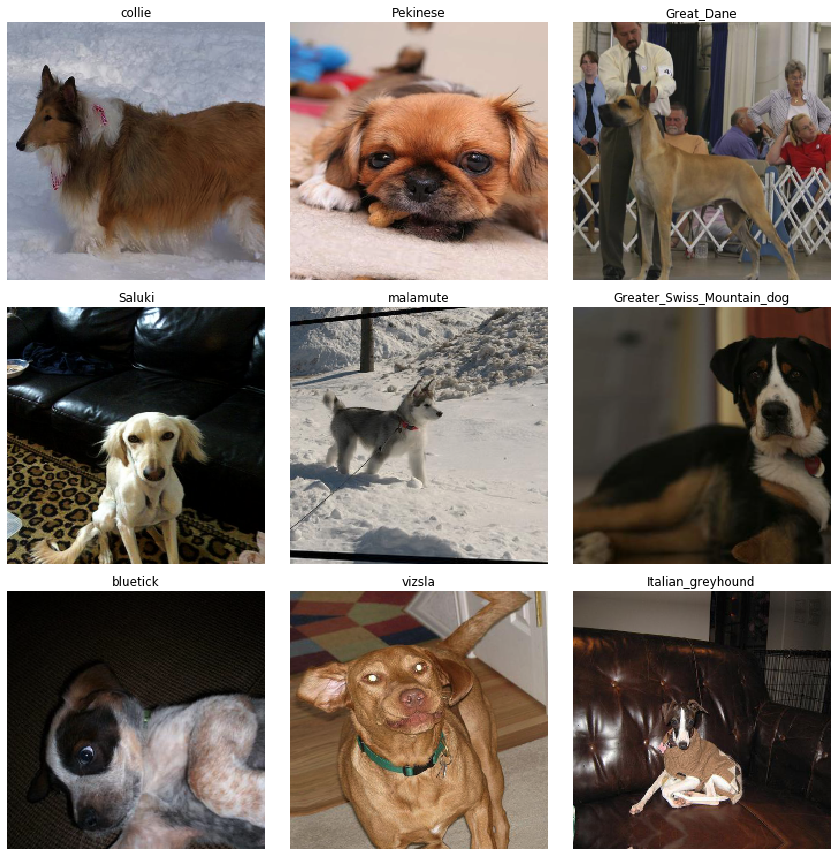

In [61]:
data.show_batch(rows=3)

In [62]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, model_dir=model_dir)
learn.model = torch.nn.DataParallel(learn.model)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


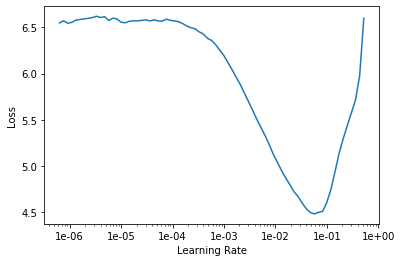

In [63]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


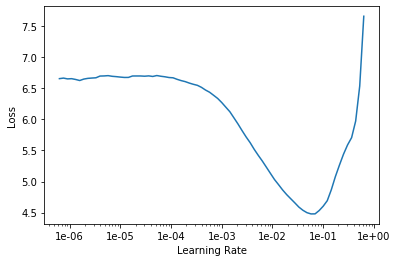

In [59]:
learn.lr_find()
learn.recorder.plot()

In [64]:
lr = 0.01

In [65]:
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,1.161609,0.615382,0.191448,00:40
1,1.143093,0.712283,0.197279,00:41
2,1.029771,0.622426,0.185860,00:40
3,0.820934,0.570854,0.170797,00:40
4,0.740239,0.499245,0.154033,00:40
5,0.622134,0.480916,0.144558,00:40
6,0.512288,0.482220,0.139213,00:41
7,0.406041,0.432063,0.128766,00:41
8,0.364765,0.420045,0.123421,00:40
9,0.320427,0.420204,0.119534,00:39


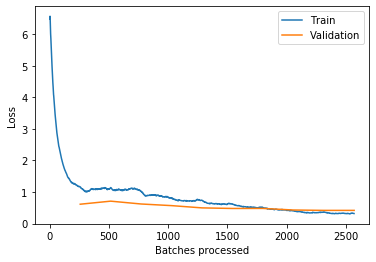

In [66]:
learn.recorder.plot_losses()

In [67]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


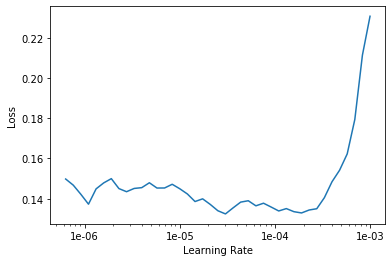

In [86]:
learn.lr_find()
learn.recorder.plot()

In [87]:
learn.fit_one_cycle(15, slice(1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.124238,0.457910,0.132653,00:49
1,0.119395,0.459706,0.132410,00:50
2,0.129698,0.468313,0.130466,00:50
3,0.125817,0.478485,0.135083,00:49
4,0.113212,0.473101,0.128523,00:50
5,0.115475,0.480103,0.131438,00:50
6,0.105535,0.479865,0.133868,00:50
7,0.110982,0.479071,0.133625,00:50
8,0.101897,0.488966,0.133868,00:49
9,0.086267,0.478502,0.134597,00:50


In [70]:
interp = ClassificationInterpretation.from_learner(learn)

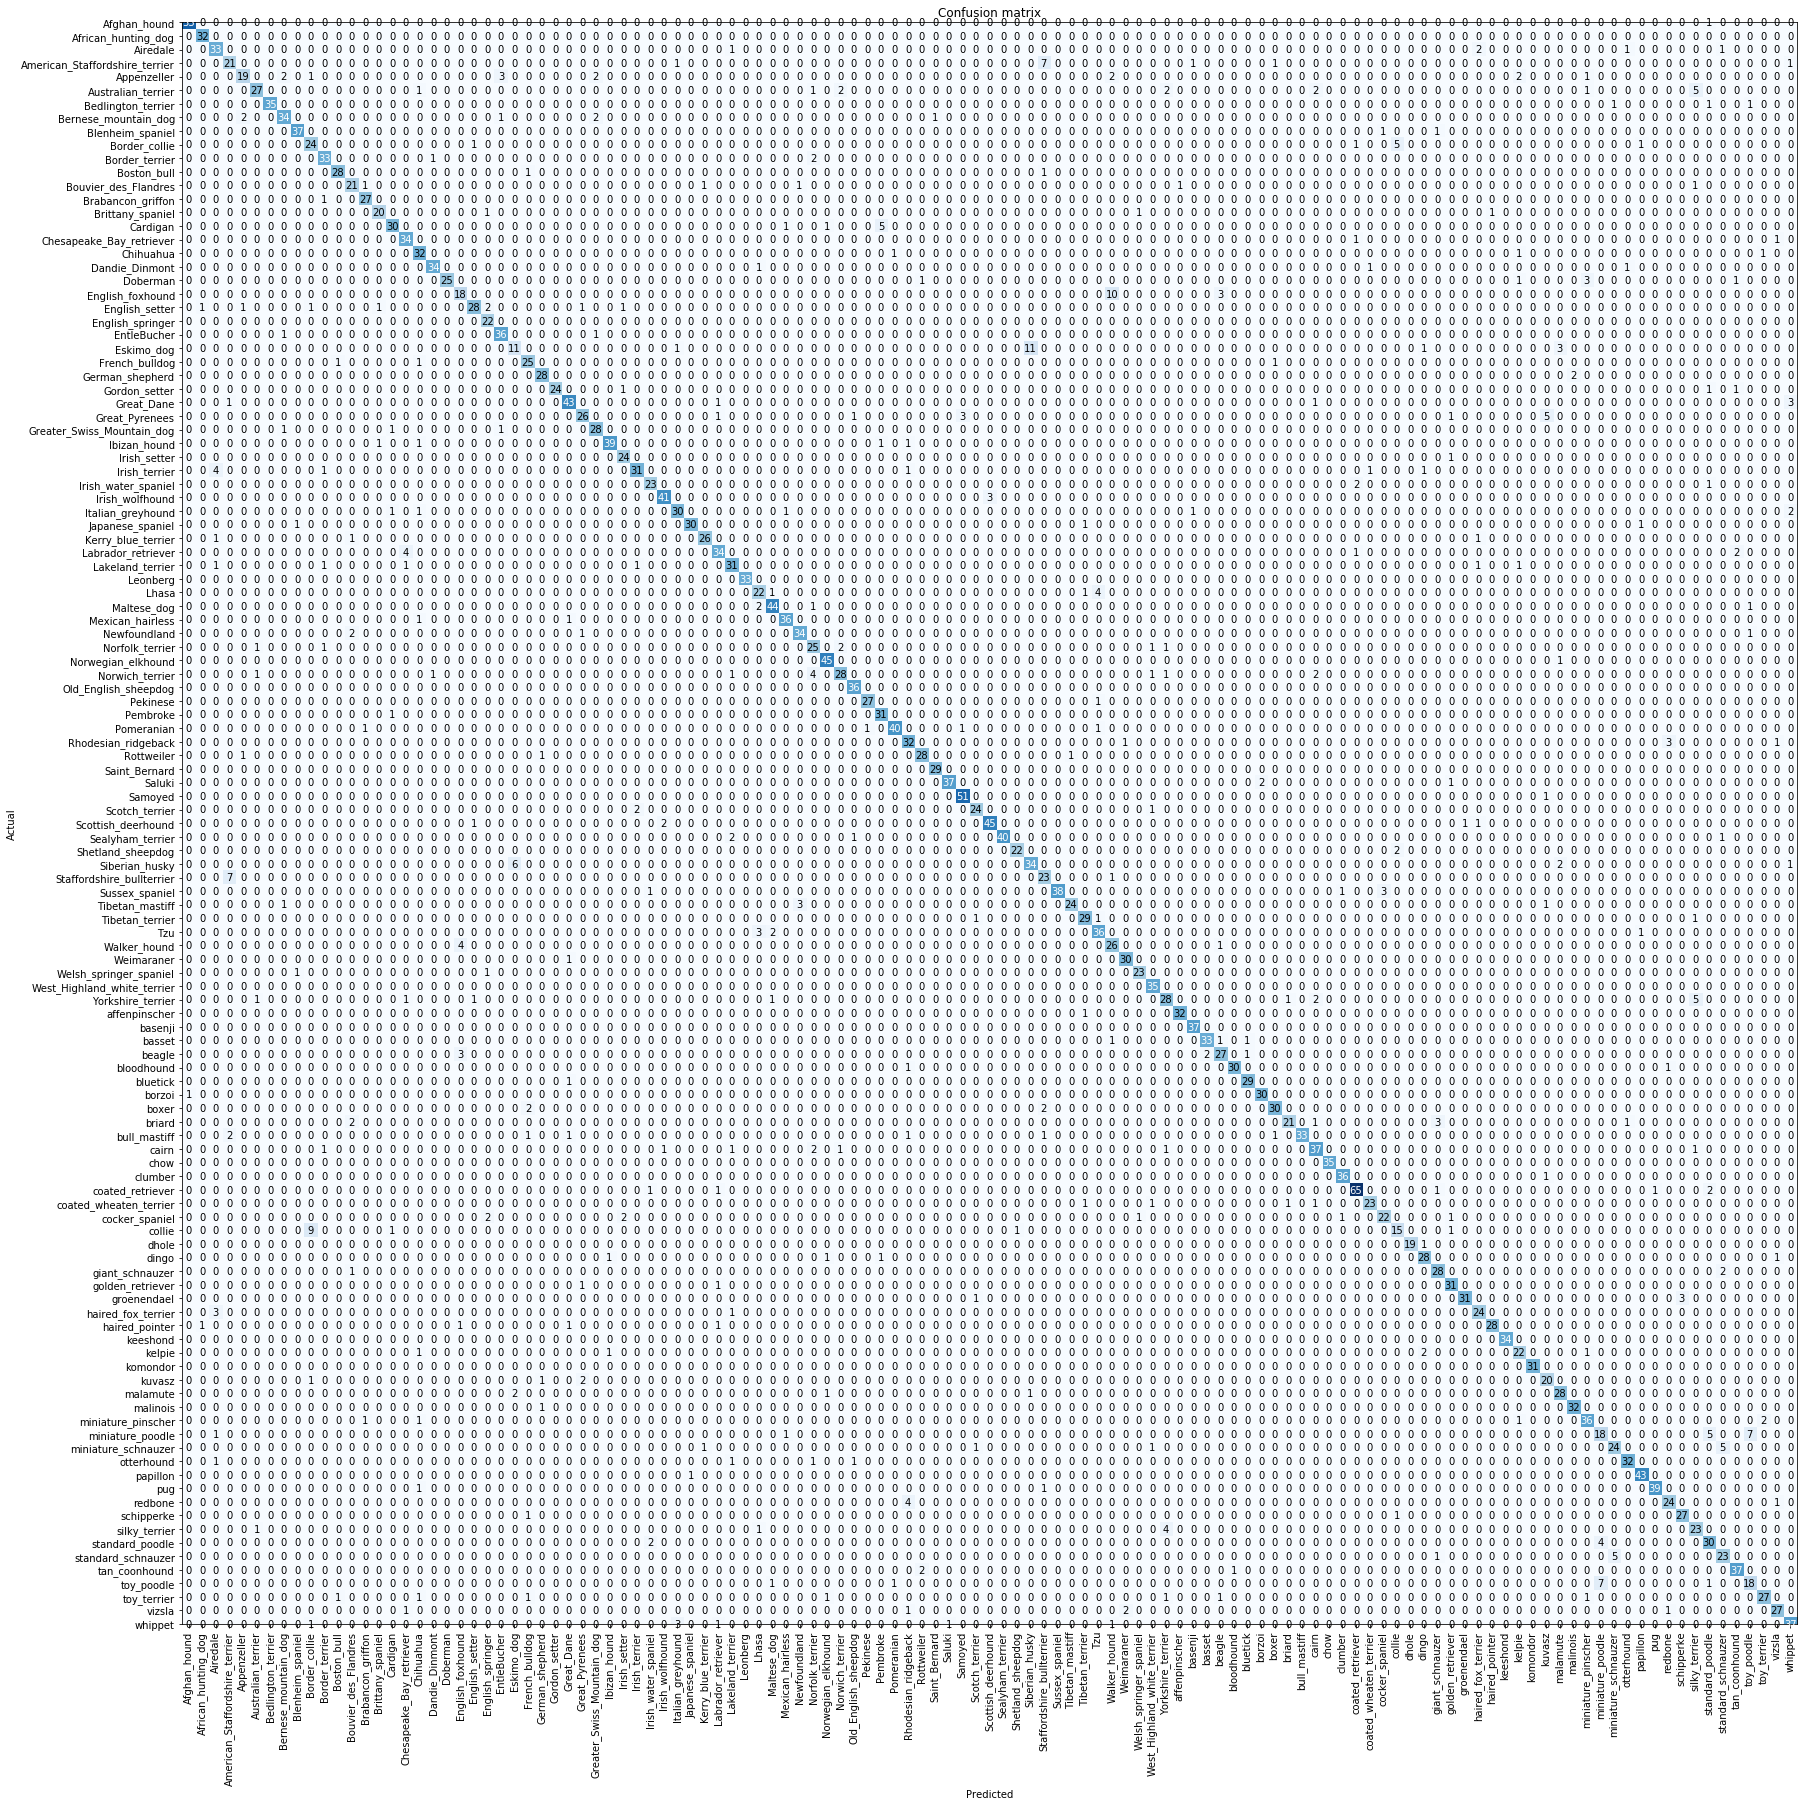

In [78]:
interp.plot_confusion_matrix(figsize=(25,25))

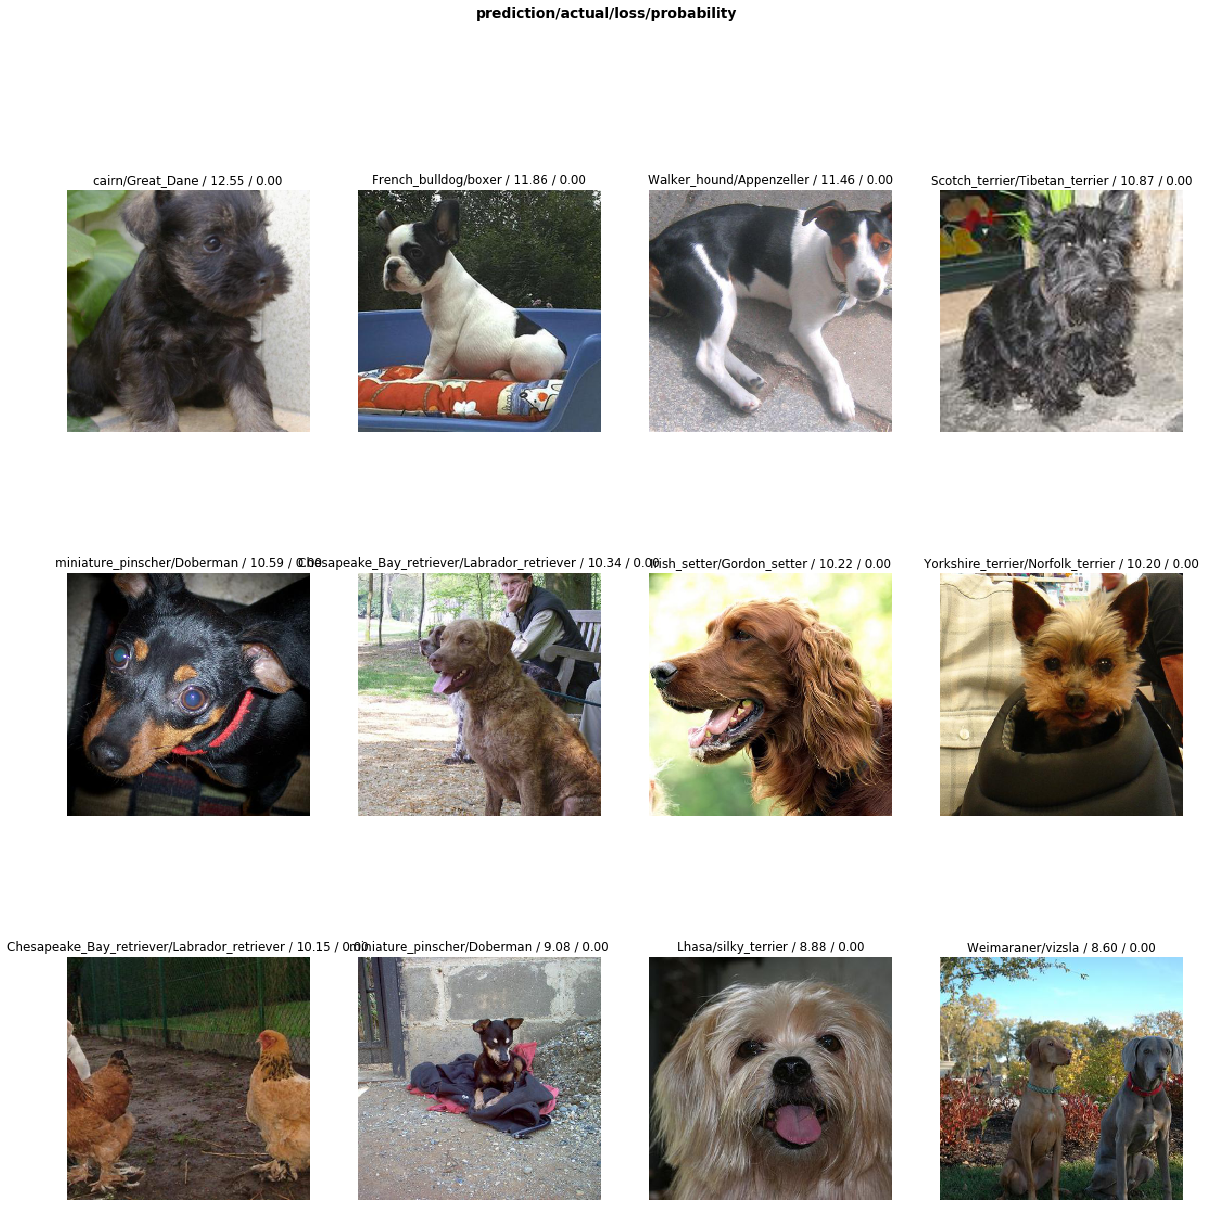

In [84]:
interp.plot_top_losses(12, figsize=(20,20), heatmap=False)